In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import wordnet
import string
from nltk.corpus import stopwords
from collections import Counter
stop_words = stopwords.words('english')
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/chengtian/nltk_data'
    - '/Users/chengtian/anaconda3/nltk_data'
    - '/Users/chengtian/anaconda3/share/nltk_data'
    - '/Users/chengtian/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
def file_open(path):
    print('Start read data from file')
    input_read = pd.read_excel(path) 
    df = pd.DataFrame(input_read)
    print('Read data')
    return df

In [ ]:
def relation_data(path):
    res = []
    df = file_open(path)
    for index,data in enumerate(df["issue_ID"],start=1):
        if index == df.shape[0]:
            break
        if df["issue_ID"][index]== df["issue_ID"][index-1]:
            if df["commenter"][index-1] != df["commenter"][index]:
                res.append((df["commenter"][index-1],df["commenter"][index]))
    return res

In [ ]:
def node_list(path):
    df = file_open(path)
   
    return set(df["commenter"])

In [ ]:
def relation_data_sorted(path):
    res = []
    df = file_open(path)
      
    for index,data in enumerate(df["issue_ID"],start=1):
        if index == df.shape[0]:
            break
        if df["issue_ID"][index]== df["issue_ID"][index-1]:
            if df["commenter"][index-1] != df["commenter"][index]:
                res.append((df["commenter"][index-1],df["commenter"][index]))
    
    return [tuple(sorted(i)) for i in res]

In [49]:
def draw_graph(dict):
    G=nx.random_geometric_graph(1000,0.125)
    pos=nx.get_node_attributes(G,'pos')
    dmin=1
    ncenter=0
    for n in pos:
        x,y=pos[n]
        d=(x-0.5)**2+(y-0.5)**2
        if d<dmin:
            ncenter=n
            dmin=d
    p=nx.single_source_shortest_path_length(G,ncenter)
    plt.figure(figsize=(10,10))
    nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
    nx.draw_networkx_nodes(G,pos,nodelist=dict.keys(),
                       node_size=80,
                       node_color=dict.values(),
                       cmap=plt.cm.Reds_r)

    

In [50]:
path = "data\closed_comment_test.xlsx"
a = relation_data(path)
b = relation_data_sorted(path)
c = Counter(a)
d = node_list(path)


Start read data from file
Read data
Start read data from file
Read data
Start read data from file
Read data


In [51]:
list(d)

['Ayms',
 'e-nexus',
 'vinnyvoo',
 'SearchAndDestroy',
 'NickyYangYang',
 'TheBlueMatt',
 'funasty1985',
 'melaxon',
 'wuchiachih',
 'nopara73',
 'DianJakaWidiawan',
 'LucaPaterlini',
 'jnewbery',
 'FIVIL',
 'jmcorgan',
 'azetrom',
 'sangaman',
 'practicalswift',
 'GusevVasily',
 'jb55',
 'sergeyklay',
 'sipa',
 'h4x3rotab',
 'alexeyneu',
 'molxyz',
 'ryanofsky',
 'crowdcoinChain',
 'eserlxl',
 'cryptozeny',
 'isghe',
 'efvhi',
 'mmortal03',
 'domob1812',
 'DinoStray',
 'sanjays95',
 'giaki3003',
 'MeshCollider',
 'jtimon',
 'sdaftuar',
 'nkostoulas',
 'NicolasDorier',
 'theuni',
 'bekarys0504',
 'yzhou61',
 'adminstratio',
 'dmchess',
 'barryton999',
 'hamnaz',
 'syrius01',
 'ZexiFangkong',
 'kirillkovalenko',
 'scravy',
 'Derek701',
 'ch4ot1c',
 'kallewoof',
 'MarcoFalke',
 'achow101',
 'ReneFroger',
 'fanquake',
 'Sjors',
 '3s3s',
 'marcoagner',
 'alexander7567',
 'leishman',
 'sipsorcery',
 'unixb0y',
 'RHavar',
 'Empact',
 'sanket1729',
 'promag',
 'coinsmith',
 'kristapsk',
 'Aki

In [52]:
c_directed = Counter(a)    #directed relation  ex: [a,b] != [b,a]
c_undirected = Counter(b)   #undirected relation  ex: [a,b] == [b,a]

In [53]:
c_directed

Counter({('MeshCollider', 'wuchiachih'): 2,
         ('wuchiachih', 'MeshCollider'): 1,
         ('wuchiachih', 'sipa'): 1,
         ('ch4ot1c', 'vinnyvoo'): 3,
         ('vinnyvoo', 'ch4ot1c'): 2,
         ('dmchess', 'DocOBITCOIN'): 1,
         ('promag', 'hamnaz'): 1,
         ('hamnaz', 'fanquake'): 1,
         ('promag', 'bunnguyen2410'): 1,
         ('bunnguyen2410', 'MarcoFalke'): 1,
         ('MarcoFalke', 'ken2812221'): 2,
         ('e-nexus', 'bunnguyen2410'): 3,
         ('bunnguyen2410', 'e-nexus'): 1,
         ('bunnguyen2410', 'MeshCollider'): 1,
         ('jonasschnelli', 'msgilligan'): 1,
         ('Crypto2', 'ryanofsky'): 1,
         ('ryanofsky', 'al-maisan'): 1,
         ('al-maisan', 'promag'): 1,
         ('promag', 'nopara73'): 5,
         ('nopara73', 'promag'): 5,
         ('promag', 'RHavar'): 2,
         ('RHavar', 'promag'): 1,
         ('promag', 'jnewbery'): 1,
         ('jnewbery', 'nopara73'): 2,
         ('achow101', 'coinsmith'): 1,
         ('fanquake'

In [54]:
c_undirected

Counter({('MeshCollider', 'wuchiachih'): 3,
         ('sipa', 'wuchiachih'): 1,
         ('ch4ot1c', 'vinnyvoo'): 5,
         ('DocOBITCOIN', 'dmchess'): 1,
         ('hamnaz', 'promag'): 1,
         ('fanquake', 'hamnaz'): 1,
         ('bunnguyen2410', 'promag'): 1,
         ('MarcoFalke', 'bunnguyen2410'): 1,
         ('MarcoFalke', 'ken2812221'): 3,
         ('bunnguyen2410', 'e-nexus'): 4,
         ('MeshCollider', 'bunnguyen2410'): 1,
         ('jonasschnelli', 'msgilligan'): 1,
         ('Crypto2', 'ryanofsky'): 1,
         ('al-maisan', 'ryanofsky'): 1,
         ('al-maisan', 'promag'): 1,
         ('nopara73', 'promag'): 10,
         ('RHavar', 'promag'): 3,
         ('jnewbery', 'promag'): 1,
         ('jnewbery', 'nopara73'): 2,
         ('achow101', 'coinsmith'): 1,
         ('MarcoFalke', 'fanquake'): 1,
         ('RHavar', 'sipa'): 1,
         ('MarcoFalke', 'sipa'): 4,
         ('MarcoFalke', 'jnewbery'): 1,
         ('RHavar', 'jnewbery'): 1,
         ('RHavar', 'laanwj'

In [61]:
c_undirected.values()

dict_values([3, 1, 5, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 10, 3, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 4, 2, 8, 1, 5, 1, 2, 3, 1, 4, 1, 2, 1, 1, 1, 1, 1, 7, 1, 2, 1, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 3, 6, 2, 1, 1, 1, 3, 1, 1, 1, 5, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3])

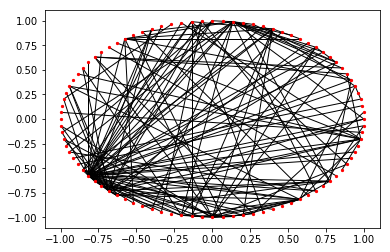

In [76]:
G=nx.MultiGraph()
G.add_nodes_from(list(d))
G.add_edges_from(c_undirected.keys())
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=False,node_size=5,)

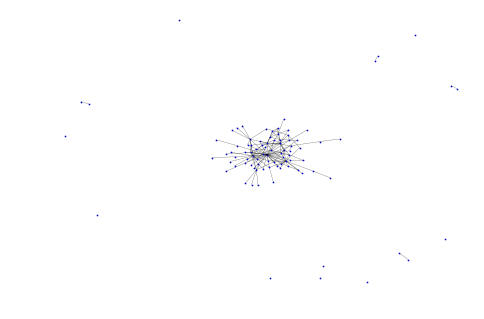

In [84]:

G = nx.MultiGraph()
colors = range(20)
G.add_nodes_from(list(d))
G.add_edges_from(c_undirected.keys())
#nx.draw_networkx_edges(G,pos = nx.drawing.layout.spring_layout(G),edge_color = '#000000',width = 0.1)
#nx.draw_networkx_nodes(G,pos = nx.drawing.layout.spring_layout(G),node_color = '#A0CBE2',node_size = 1)
nx.draw(G,pos = nx.drawing.layout.spring_layout(G),node_color='#0000CD', 
	edge_color='#000000',width=0.2, node_size = 0.5,edge_cmap=plt.cm.gray, 
	with_labels=False)
plt.show()


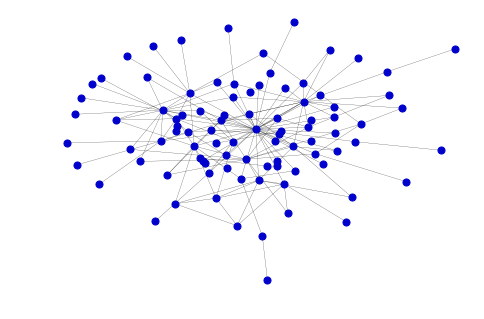

In [95]:

G = nx.MultiGraph()
colors = range(20)
G.add_nodes_from(list(d))
G.add_edges_from(c_undirected.keys())
#nx.draw_networkx_edges(G,pos = nx.drawing.layout.spring_layout(G),edge_color = '#000000',width = 0.1)
#nx.draw_networkx_nodes(G,pos = nx.drawing.layout.spring_layout(G),node_color = '#A0CBE2',node_size = 1)
nx.draw(G,pos = nx.drawing.layout.kamada_kawai_layout(G),node_color='#0000CD', 
	edge_color='#000000',width=0.2, node_size = 50,edge_cmap=plt.cm.Reds_r, 
	with_labels=False)
plt.show()


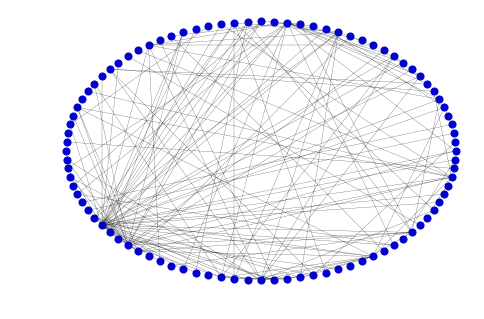

In [103]:
G = nx.MultiGraph()
colors = range(20)
G.add_nodes_from(list(d))
G.add_edges_from(c_undirected.keys())
#nx.draw_networkx_edges(G,pos = nx.drawing.layout.spring_layout(G),edge_color = '#000000',width = 0.1)
#nx.draw_networkx_nodes(G,pos = nx.drawing.layout.spring_layout(G),node_color = '#A0CBE2',node_size = 1)
nx.draw(G,pos = nx.drawing.layout.circular_layout(G),node_color='#0000CD', 
	edge_color='#000000',width=0.2, node_size = 50,edge_cmap=plt.cm.Reds_r, 
	with_labels=False)
plt.show()